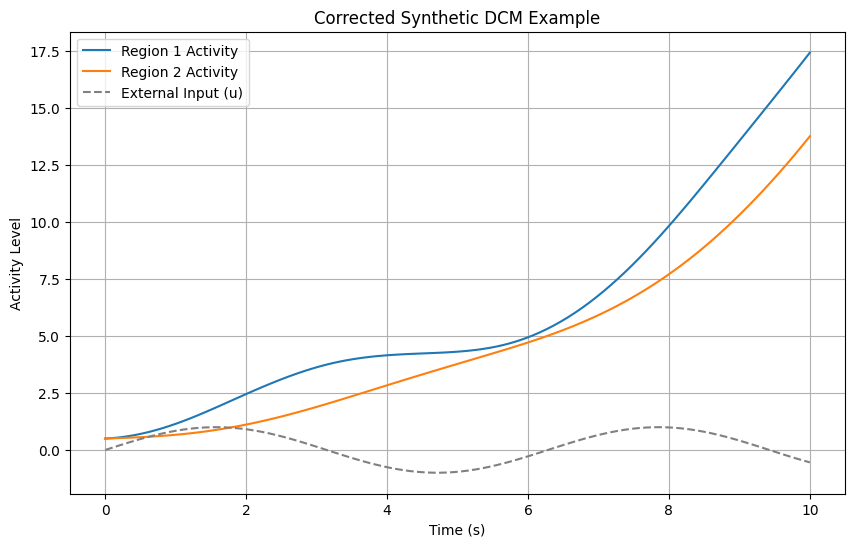

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Define the time span
t_span = (0, 10)  # From 0 to 10 seconds
t_eval = np.linspace(*t_span, 100)  # Evaluate at 100 time points

# Define the model parameters
# Assuming a simple linear interaction model: dx/dt = Ax + Bu
A = np.array([[0.1, 0.2],  # Influence of each region on itself and on the other
              [0.3, -0.1]])
B = np.array([[1],  # External input influence on the first region
              [0]])  # No external input directly influencing the second region
u = np.sin(t_eval)  # External input over time (e.g., experimental condition)

# Initial conditions (activity levels of the two regions at t=0)
x0 = [0.5, 0.5]


# Correcting the system of differential equations function
def dcm_system_corrected(t, x, A, B, u):
    u_t = np.interp(t, t_eval, u)  # Interpolate the input at time t
    return A @ x + B.flatten() * u_t  # Ensure proper dimensionality

# Solve the differential equations with the corrected function
sol_corrected = solve_ivp(dcm_system_corrected, t_span, x0, args=(A, B, u), t_eval=t_eval)

# Plot the results with the corrected solution
plt.figure(figsize=(10, 6))
plt.plot(t_eval, sol_corrected.y[0], label='Region 1 Activity')
plt.plot(t_eval, sol_corrected.y[1], label='Region 2 Activity')
plt.plot(t_eval, u, '--', label='External Input (u)', color='grey')
plt.xlabel('Time (s)')
plt.ylabel('Activity Level')
plt.title('Corrected Synthetic DCM Example')
plt.legend()
plt.grid(True)
plt.show()
